# Semantic Factors
This notebook aims for an exploratory factor analysis of "The Glasgow Norm" -- a database with 5.553 English words classified into nine psycholinguistics dimensions. The objetive in doing such an analysis is to find out empirical support for the theoretical segmentation of the semantic content, which are believed to have an objective portion and a subjective portion.

## Introduction

### Libraries

In [1]:
## Data analysis packages:
import pandas as pd
import numpy as np
from math import isnan  #Verifies if a given valu e is numerical.

In [2]:
## Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Plotly Express
import plotly.graph_objs as go
import plotly

### Definitions

In [4]:
## Forcing Pandas to display any number of elements
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
pd.options.display.max_seq_items = 15000

## DataPrep

### Importing "The Glasgow Norms" dataset
Available at https://doi.org/10.3758/s13428-018-1099-3.  
The Glasgow Norms are a set of normative ratings for 5,553 English words on nine psycholinguistic dimensions: arousal, valence, dominance, concreteness, imageability, familiarity, age of acquisition, semantic size, and gender association.

In [6]:
## Reading the dataset file:
## -> header=[0,1] parameters indicates that rows [0,1] must be considered as dataset header.
glasgow = pd.read_csv('../data/(Glasgow Norms Ratings - Sup Material) 13428_2018_1099_MOESM2_ESM.csv',
                     header=[0,1])

In [7]:
glasgow.head(2)

Words             Length   AROU Unnamed: 3_level_0  \
  Unnamed: 0_level_1 Unnamed: 1_level_1      M                 SD   
0           abattoir                  8  4.200              2.400   
1              abbey                  5  3.125              2.342   

  Unnamed: 4_level_0    VAL Unnamed: 6_level_0 Unnamed: 7_level_0    DOM  \
                   N      M                 SD                  N      M   
0                 25  2.864              1.740                 22  4.333   
1                 32  5.781              1.268                 32  4.667   

  Unnamed: 9_level_0 Unnamed: 10_level_0    CNC Unnamed: 12_level_0  \
                  SD                   N      M                  SD   
0              1.285                  21  5.455               1.900   
1              1.551                  33  5.906               1.508   

  Unnamed: 13_level_0   IMAG Unnamed: 15_level_0 Unnamed: 16_level_0    FAM  \
                    N      M                  SD                   N      M   
0                  22  4.391               2.121                  23  2.382   
1                  32  5.344               1.881                  32  3.324   

  Unnamed: 18_level_0 Unnamed: 19_level_0    AOA Unnamed: 21_level_0  \
                   SD                   N      M                  SD   
0               1.799                  34  6.760               0.427   
1               1.810                  34  5.177               1.339   

  Unnamed: 22_level_0   SIZE Unnamed: 24_level_0 Unnamed: 25_level_0   GEND  \
                    N      M                  SD                   N      M   
0                  25  4.652               1.549                  23  5.391   
1                  34  5.121               1.629                  33  3.303   

  Unnamed: 27_level_0 Unnamed: 28_level_0  
                   SD                   N  
0               1.170                  23  
1               1.193                  33

#### DataPrep: adjusting the column/feature label

In [8]:
## Reading the dataset file, but now discarding the first header row:
glasgow = pd.read_csv('../data/(Glasgow Norms Ratings - Sup Material) 13428_2018_1099_MOESM2_ESM.csv',
                     header=[1])

In [9]:
glasgow.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'M', 'SD', 'N', 'M.1', 'SD.1', 'N.1', 'M.2',
       'SD.2', 'N.2', 'M.3', 'SD.3', 'N.3', 'M.4', 'SD.4', 'N.4', 'M.5',
       'SD.5', 'N.5', 'M.6', 'SD.6', 'N.6', 'M.7', 'SD.7', 'N.7', 'M.8',
       'SD.8', 'N.8'],
      dtype='object')

In [10]:
glasgow.columns = ['words', 'length', 
                   'AROU_M', 'AROU_SD', 'AROU_N',
                   'VAL_M', 'VAL_SD', 'VAL_N',
                   'DOM_M', 'DOM_SD', 'DOM_N',
                   'CNC_M', 'CNC_SD', 'CNC_N',
                   'IMAG_M', 'IMAG_SD', 'IMAG_N',
                   'FAM_M', 'FAM_SD', 'FAM_N',
                   'AOA_M', 'AOA_SD', 'AOA_N',
                   'SIZE_M', 'SIZE_SD', 'SIZE_N',
                   'GEND_M', 'GEND_SD', 'GEND_N']

In [11]:
glasgow.head()

words  length  AROU_M  AROU_SD  AROU_N  VAL_M  VAL_SD  VAL_N  DOM_M  \
0    abattoir       8   4.200    2.400      25  2.864   1.740     22  4.333   
1       abbey       5   3.125    2.342      32  5.781   1.268     32  4.667   
2  abbreviate      10   3.273    1.582      33  5.250   1.031     32  5.235   
3    abdicate       8   4.194    1.941      31  3.767   1.383     30  4.419   
4  abdication      10   3.846    2.282      26  3.880   1.608     25  4.800   

   DOM_SD  DOM_N  CNC_M  CNC_SD  CNC_N  IMAG_M  IMAG_SD  IMAG_N  FAM_M  \
0   1.285     21  5.455   1.900     22   4.391    2.121      23  2.382   
1   1.551     33  5.906   1.508     32   5.344    1.881      32  3.324   
2   1.238     34  3.286   1.733     35   3.177    1.689      34  5.121   
3   2.182     31  3.367   1.853     30   2.516    1.521      31  3.971   
4   1.960     25  3.292   1.620     24   2.571    1.294      28  3.097   

   FAM_SD  FAM_N  AOA_M  AOA_SD  AOA_N  SIZE_M  SIZE_SD  SIZE_N  GEND_M  \
0   1.799     34  6.760   0.427     25   4.652    1.549      23   5.391   
1   1.810     34  5.177   1.339     34   5.121    1.629      33   3.303   
2   1.838     33  5.543   1.130     35   2.667    1.700      33   3.971   
3   2.077     35  6.233   0.844     30   4.679    1.441      28   5.167   
4   2.022     31  6.407   0.913     27   5.083    1.351      24   4.571   

   GEND_SD  GEND_N  
0    1.170      23  
1    1.193      33  
2    0.954      34  
3    1.186      30  
4    1.015      28

In [12]:
## Exportando o dataframe ajustado para um arquivo CSV:
#glasgow.to_csv('./dataset_GlasgowR/GlasgowR_pandas_ready.csv')

In [13]:
glasgow

words  length  AROU_M  AROU_SD  AROU_N  VAL_M  VAL_SD  VAL_N  \
0       abattoir       8   4.200    2.400      25  2.864   1.740     22   
1          abbey       5   3.125    2.342      32  5.781   1.268     32   
2     abbreviate      10   3.273    1.582      33  5.250   1.031     32   
3       abdicate       8   4.194    1.941      31  3.767   1.383     30   
4     abdication      10   3.846    2.282      26  3.880   1.608     25   
...          ...     ...     ...      ...     ...    ...     ...    ...   
5548    zeppelin       8   6.185    2.037      27  5.000   1.414     27   
5549        zero       4   4.031    2.023      32  4.182   1.585     33   
5550        zest       4   5.969    2.158      32  6.818   1.313     33   
5551         zoo       3   5.909    2.137      33  6.235   1.800     34   
5552     zoology       7   4.571    2.060      35  5.765   0.972     34   

      DOM_M  DOM_SD  DOM_N  CNC_M  CNC_SD  CNC_N  IMAG_M  IMAG_SD  IMAG_N  \
0     4.333   1.285     21  5.455   1.900     22   4.391    2.121      23   
1     4.667   1.551     33  5.906   1.508     32   5.344    1.881      32   
2     5.235   1.238     34  3.286   1.733     35   3.177    1.689      34   
3     4.419   2.182     31  3.367   1.853     30   2.516    1.521      31   
4     4.800   1.960     25  3.292   1.620     24   2.571    1.294      28   
...     ...     ...    ...    ...     ...    ...     ...      ...     ...   
5548  5.333   1.743     27  6.286   0.920     28   6.185    1.123      27   
5549  4.567   2.124     30  2.688   1.895     32   3.903    2.347      31   
5550  6.121   1.320     33  4.438   1.694     32   4.033    1.622      30   
5551  5.485   1.598     33  6.118   1.105     34   6.441    1.006      34   
5552  5.114   1.545     35  4.429   1.841     35   3.914    1.481      35   

      FAM_M  FAM_SD  FAM_N  AOA_M  AOA_SD  AOA_N  SIZE_M  SIZE_SD  SIZE_N  \
0     2.382   1.799     34  6.760   0.427     25   4.652    1.549      23   
1     3.324   1.810     34  5.177   1.339     34   5.121    1.629      33   
2     5.121   1.838     33  5.543   1.130     35   2.667    1.700      33   
3     3.971   2.077     35  6.233   0.844     30   4.679    1.441      28   
4     3.097   2.022     31  6.407   0.913     27   5.083    1.351      24   
...     ...     ...    ...    ...     ...    ...     ...      ...     ...   
5548  3.167   2.115     30  6.036   0.944     28   5.464    1.721      28   
5549  6.269   1.195     26  2.636   1.123     33   1.758    1.393      33   
5550  4.000   1.626     31  5.364   1.123     33   2.636    1.738      33   
5551  5.655   1.747     29  2.324   0.674     34   4.844    1.873      32   
5552  4.382   1.956     34  5.824   1.150     34   4.571    1.609      35   

      GEND_M  GEND_SD  GEND_N  
0      5.391    1.170      23  
1      3.303    1.193      33  
2      3.971    0.954      34  
3      5.167    1.186      30  
4      4.571    1.015      28  
...      ...      ...     ...  
5548   5.269    1.021      26  
5549   4.172    0.647      29  
5550   3.452    1.011      31  
5551   4.059    0.802      34  
5552   3.657    1.068      35  

[5553 rows x 29 columns]

### Setting the columns "words" as dataframe index:

In [14]:
glasgow.set_index('words', inplace=True)

----
### Segmenting the database into variables of interest

In [15]:
import re

In [16]:
## Listing only columns related to _M (mean) and _SD (standard deviation)
interest = ['AROU_M', 'AROU_SD',
                   'VAL_M', 'VAL_SD',
                   'DOM_M', 'DOM_SD',
                   'CNC_M', 'CNC_SD',
                   'IMAG_M', 'IMAG_SD',
                   'FAM_M', 'FAM_SD',
                   'AOA_M', 'AOA_SD',
                   'SIZE_M', 'SIZE_SD',
                   'GEND_M', 'GEND_SD']

### Selecting only columns related to _M (mean)

In [17]:
tmp_pattern_M = re.compile(r'.*_M$')
tmp_M_parameters = list(filter(tmp_pattern_M.match, interest))

print(tmp_M_parameters)

['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']


In [18]:
df_M = glasgow[tmp_M_parameters]
df_M

AROU_M  VAL_M  DOM_M  CNC_M  IMAG_M  FAM_M  AOA_M  SIZE_M  GEND_M
words                                                                        
abattoir     4.200  2.864  4.333  5.455   4.391  2.382  6.760   4.652   5.391
abbey        3.125  5.781  4.667  5.906   5.344  3.324  5.177   5.121   3.303
abbreviate   3.273  5.250  5.235  3.286   3.177  5.121  5.543   2.667   3.971
abdicate     4.194  3.767  4.419  3.367   2.516  3.971  6.233   4.679   5.167
abdication   3.846  3.880  4.800  3.292   2.571  3.097  6.407   5.083   4.571
...            ...    ...    ...    ...     ...    ...    ...     ...     ...
zeppelin     6.185  5.000  5.333  6.286   6.185  3.167  6.036   5.464   5.269
zero         4.031  4.182  4.567  2.688   3.903  6.269  2.636   1.758   4.172
zest         5.969  6.818  6.121  4.438   4.033  4.000  5.364   2.636   3.452
zoo          5.909  6.235  5.485  6.118   6.441  5.655  2.324   4.844   4.059
zoology      4.571  5.765  5.114  4.429   3.914  4.382  5.824   4.571   3.657

[5553 rows x 9 columns]

----
### Selecting only columns related to _SD (standard deviation)

In [19]:
tmp_pattern_SD = re.compile(r'.*_SD$')
tmp_SD_parameters = list(filter(tmp_pattern_SD.match, interest))

print(tmp_SD_parameters)

['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_SD']


In [20]:
## Selecting a dataframe with SD values:
df_SD = glasgow[tmp_SD_parameters]
df_SD

AROU_SD  VAL_SD  DOM_SD  CNC_SD  IMAG_SD  FAM_SD  AOA_SD  SIZE_SD  \
words                                                                           
abattoir      2.400   1.740   1.285   1.900    2.121   1.799   0.427    1.549   
abbey         2.342   1.268   1.551   1.508    1.881   1.810   1.339    1.629   
abbreviate    1.582   1.031   1.238   1.733    1.689   1.838   1.130    1.700   
abdicate      1.941   1.383   2.182   1.853    1.521   2.077   0.844    1.441   
abdication    2.282   1.608   1.960   1.620    1.294   2.022   0.913    1.351   
...             ...     ...     ...     ...      ...     ...     ...      ...   
zeppelin      2.037   1.414   1.743   0.920    1.123   2.115   0.944    1.721   
zero          2.023   1.585   2.124   1.895    2.347   1.195   1.123    1.393   
zest          2.158   1.313   1.320   1.694    1.622   1.626   1.123    1.738   
zoo           2.137   1.800   1.598   1.105    1.006   1.747   0.674    1.873   
zoology       2.060   0.972   1.545   1.841    1.481   1.956   1.150    1.609   

            GEND_SD  
words                
abattoir      1.170  
abbey         1.193  
abbreviate    0.954  
abdicate      1.186  
abdication    1.015  
...             ...  
zeppelin      1.021  
zero          0.647  
zest          1.011  
zoo           0.802  
zoology       1.068  

[5553 rows x 9 columns]

----
### Creating a dataframe with calculated variance (VAR)

In [21]:
## Creating a dataframe with variance values (variance = SD^2)
df_VAR = df_SD**2

In [22]:
## Using regular expression to replace the suffix in column names:
tmp_VAR_columns = [re.sub(r'_SD$', '_VAR', item) for item in list(df_VAR.columns)]
df_VAR.columns = tmp_VAR_columns
df_VAR

AROU_VAR   VAL_VAR   DOM_VAR   CNC_VAR  IMAG_VAR   FAM_VAR  \
words                                                                    
abattoir    5.760000  3.027600  1.651225  3.610000  4.498641  3.236401   
abbey       5.484964  1.607824  2.405601  2.274064  3.538161  3.276100   
abbreviate  2.502724  1.062961  1.532644  3.003289  2.852721  3.378244   
abdicate    3.767481  1.912689  4.761124  3.433609  2.313441  4.313929   
abdication  5.207524  2.585664  3.841600  2.624400  1.674436  4.088484   
...              ...       ...       ...       ...       ...       ...   
zeppelin    4.149369  1.999396  3.038049  0.846400  1.261129  4.473225   
zero        4.092529  2.512225  4.511376  3.591025  5.508409  1.428025   
zest        4.656964  1.723969  1.742400  2.869636  2.630884  2.643876   
zoo         4.566769  3.240000  2.553604  1.221025  1.012036  3.052009   
zoology     4.243600  0.944784  2.387025  3.389281  2.193361  3.825936   

             AOA_VAR  SIZE_VAR  GEND_VAR  
words                                     
abattoir    0.182329  2.399401  1.368900  
abbey       1.792921  2.653641  1.423249  
abbreviate  1.276900  2.890000  0.910116  
abdicate    0.712336  2.076481  1.406596  
abdication  0.833569  1.825201  1.030225  
...              ...       ...       ...  
zeppelin    0.891136  2.961841  1.042441  
zero        1.261129  1.940449  0.418609  
zest        1.261129  3.020644  1.022121  
zoo         0.454276  3.508129  0.643204  
zoology     1.322500  2.588881  1.140624  

[5553 rows x 9 columns]

----
### Preparing a dataframe with means and variance of the nine psycholinguistic variables

In [24]:
## Combining df_M and df_VAR dataframes, i.e., means and variance.
df_M_VAR = pd.concat([df_M, df_VAR], axis=1)
df_M_VAR

AROU_M  VAL_M  DOM_M  CNC_M  IMAG_M  FAM_M  AOA_M  SIZE_M  GEND_M  \
words                                                                           
abattoir     4.200  2.864  4.333  5.455   4.391  2.382  6.760   4.652   5.391   
abbey        3.125  5.781  4.667  5.906   5.344  3.324  5.177   5.121   3.303   
abbreviate   3.273  5.250  5.235  3.286   3.177  5.121  5.543   2.667   3.971   
abdicate     4.194  3.767  4.419  3.367   2.516  3.971  6.233   4.679   5.167   
abdication   3.846  3.880  4.800  3.292   2.571  3.097  6.407   5.083   4.571   
...            ...    ...    ...    ...     ...    ...    ...     ...     ...   
zeppelin     6.185  5.000  5.333  6.286   6.185  3.167  6.036   5.464   5.269   
zero         4.031  4.182  4.567  2.688   3.903  6.269  2.636   1.758   4.172   
zest         5.969  6.818  6.121  4.438   4.033  4.000  5.364   2.636   3.452   
zoo          5.909  6.235  5.485  6.118   6.441  5.655  2.324   4.844   4.059   
zoology      4.571  5.765  5.114  4.429   3.914  4.382  5.824   4.571   3.657   

            AROU_VAR   VAL_VAR   DOM_VAR   CNC_VAR  IMAG_VAR   FAM_VAR  \
words                                                                    
abattoir    5.760000  3.027600  1.651225  3.610000  4.498641  3.236401   
abbey       5.484964  1.607824  2.405601  2.274064  3.538161  3.276100   
abbreviate  2.502724  1.062961  1.532644  3.003289  2.852721  3.378244   
abdicate    3.767481  1.912689  4.761124  3.433609  2.313441  4.313929   
abdication  5.207524  2.585664  3.841600  2.624400  1.674436  4.088484   
...              ...       ...       ...       ...       ...       ...   
zeppelin    4.149369  1.999396  3.038049  0.846400  1.261129  4.473225   
zero        4.092529  2.512225  4.511376  3.591025  5.508409  1.428025   
zest        4.656964  1.723969  1.742400  2.869636  2.630884  2.643876   
zoo         4.566769  3.240000  2.553604  1.221025  1.012036  3.052009   
zoology     4.243600  0.944784  2.387025  3.389281  2.193361  3.825936   

             AOA_VAR  SIZE_VAR  GEND_VAR  
words                                     
abattoir    0.182329  2.399401  1.368900  
abbey       1.792921  2.653641  1.423249  
abbreviate  1.276900  2.890000  0.910116  
abdicate    0.712336  2.076481  1.406596  
abdication  0.833569  1.825201  1.030225  
...              ...       ...       ...  
zeppelin    0.891136  2.961841  1.042441  
zero        1.261129  1.940449  0.418609  
zest        1.261129  3.020644  1.022121  
zoo         0.454276  3.508129  0.643204  
zoology     1.322500  2.588881  1.140624  

[5553 rows x 18 columns]

### Preparing a dataframe with Mean, SD

In [25]:
## Combining mean, standard deviation, and variance:
df_M_SD = pd.concat([df_M, df_SD], axis=1)
df_M_SD

AROU_M  VAL_M  DOM_M  CNC_M  IMAG_M  FAM_M  AOA_M  SIZE_M  GEND_M  \
words                                                                           
abattoir     4.200  2.864  4.333  5.455   4.391  2.382  6.760   4.652   5.391   
abbey        3.125  5.781  4.667  5.906   5.344  3.324  5.177   5.121   3.303   
abbreviate   3.273  5.250  5.235  3.286   3.177  5.121  5.543   2.667   3.971   
abdicate     4.194  3.767  4.419  3.367   2.516  3.971  6.233   4.679   5.167   
abdication   3.846  3.880  4.800  3.292   2.571  3.097  6.407   5.083   4.571   
...            ...    ...    ...    ...     ...    ...    ...     ...     ...   
zeppelin     6.185  5.000  5.333  6.286   6.185  3.167  6.036   5.464   5.269   
zero         4.031  4.182  4.567  2.688   3.903  6.269  2.636   1.758   4.172   
zest         5.969  6.818  6.121  4.438   4.033  4.000  5.364   2.636   3.452   
zoo          5.909  6.235  5.485  6.118   6.441  5.655  2.324   4.844   4.059   
zoology      4.571  5.765  5.114  4.429   3.914  4.382  5.824   4.571   3.657   

            AROU_SD  VAL_SD  DOM_SD  CNC_SD  IMAG_SD  FAM_SD  AOA_SD  SIZE_SD  \
words                                                                           
abattoir      2.400   1.740   1.285   1.900    2.121   1.799   0.427    1.549   
abbey         2.342   1.268   1.551   1.508    1.881   1.810   1.339    1.629   
abbreviate    1.582   1.031   1.238   1.733    1.689   1.838   1.130    1.700   
abdicate      1.941   1.383   2.182   1.853    1.521   2.077   0.844    1.441   
abdication    2.282   1.608   1.960   1.620    1.294   2.022   0.913    1.351   
...             ...     ...     ...     ...      ...     ...     ...      ...   
zeppelin      2.037   1.414   1.743   0.920    1.123   2.115   0.944    1.721   
zero          2.023   1.585   2.124   1.895    2.347   1.195   1.123    1.393   
zest          2.158   1.313   1.320   1.694    1.622   1.626   1.123    1.738   
zoo           2.137   1.800   1.598   1.105    1.006   1.747   0.674    1.873   
zoology       2.060   0.972   1.545   1.841    1.481   1.956   1.150    1.609   

            GEND_SD  
words                
abattoir      1.170  
abbey         1.193  
abbreviate    0.954  
abdicate      1.186  
abdication    1.015  
...             ...  
zeppelin      1.021  
zero          0.647  
zest          1.011  
zoo           0.802  
zoology       1.068  

[5553 rows x 18 columns]

----
## Correlation Analysis of the mean of psycholinguistics dimensions

<Axes: >

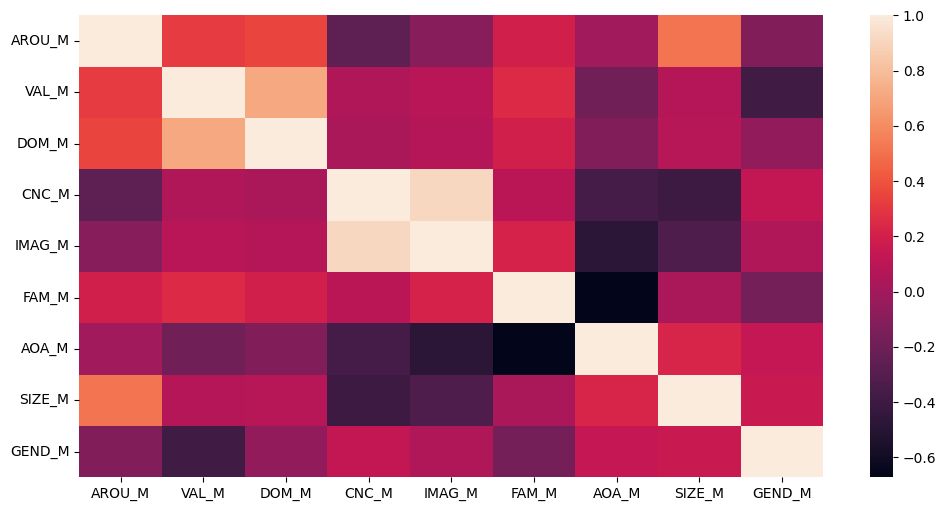

In [26]:
## Plotting the correlation map only for Mean values
plt.figure(figsize=(12,6))
c= df_M.corr()
sns.heatmap(c)

-----
### Visualizing features with confidence interval:

In [32]:
import plotly.graph_objects as go
import plotly.colors as pc

import cufflinks as cf


def viz_GlasgowR(words=['dog', 'cat'], dataframe=None):
    '''Visualiza as features psicolínguisticas de uma lista de palavras a partir 
    dos parâmetros dispostos no The Glasgow Norm, já carregados no dataframe "words". 
    Sintaxe: viz_GlasgowR(words, dataframe), onde:
        words = lista de strings contidas no dicionário/base Glasgow Rate.
        dataframe = DataFrame contendo os dados.
        
    Updated: 2023.08.26 - Adding alpha channel to plot standard deviation.
    '''
    if dataframe is None:
        raise ValueError("You need to provide a DataFrame containing the data.")

    ## Eixo-x, numérico:
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    ## Rótulo do eixo-x:
    xticks = ['AROU', 'VAL', 'DOM', 'CNC', 'IMAG', 'FAM', 'AOA', 'SIZE', 'GEND']
    ## Labels a serem buscados no dicionário Glasgow:
    label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']
    label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_M']
    
    # Generate a list of unique colors using Plotly's color scales
    num_colors = len(words)
    colors = pc.qualitative.Plotly[:num_colors]
    
    fig = go.Figure()

    for word, color in zip(words, colors):
        if word in dataframe.index:
            feat_M = list(dataframe.loc[word][label_M])
            feat_SD = list(dataframe.loc[word][label_SD])
            y_upper = [a + b for a, b in zip(feat_M, feat_SD)]
            y_lower = [a - b for a, b in zip(feat_M, feat_SD)]

            fig.add_trace(go.Scatter(
                x=x,
                y=feat_M,
                line=dict(color=color),  # Assign a unique color to each word
                mode='lines',
                name=word,
                showlegend=True
            ))

            fig.add_trace(go.Scatter(
                x=x + x[::-1],  # x, then x reversed
                y=y_upper + y_lower[::-1],  # upper, then lower reversed
                fill='toself',
                # fillcolor='rgba(0,100,80,0.2)',
                # HEX to RGBA (transparency)
                fillcolor=cf.colors.to_rgba(color,.2),
                line=dict(color='rgba(255,255,255,0)'),
                hoverinfo="skip",
                showlegend=False
            ))
        
    ## Atualizando o xtick label a partir do nome das colunas:
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9],
            ticktext=xticks
        )
    )
    
    return fig

ModuleNotFoundError: No module named 'cufflinks'

In [28]:
glasgow.loc['gun']

length      3.000
AROU_M      5.571
AROU_SD     2.739
AROU_N     35.000
VAL_M       2.800
VAL_SD      2.135
VAL_N      35.000
DOM_M       5.147
DOM_SD      2.992
DOM_N      34.000
CNC_M       6.441
CNC_SD      1.090
CNC_N      34.000
IMAG_M      6.686
IMAG_SD     0.785
IMAG_N     35.000
FAM_M       6.429
FAM_SD      0.871
FAM_N      35.000
AOA_M       2.857
AOA_SD      1.199
AOA_N      35.000
SIZE_M      3.647
SIZE_SD     1.998
SIZE_N     34.000
GEND_M      6.057
GEND_SD     0.826
GEND_N     35.000
Name: gun, dtype: float64

In [29]:
viz_GlasgowR(words=['woman'], dataframe=df)

NameError: name 'viz_GlasgowR' is not defined

In [30]:
viz_GlasgowR(words=['dog', 'dream'], dataframe=df)

NameError: name 'viz_GlasgowR' is not defined

> Experimenting some words visualization:

In [31]:
fig_dog = viz_GlasgowR(['elephant','worm'], df)
fig_dog

NameError: name 'viz_GlasgowR' is not defined

> EBNS suggested the words "snake" e "dog".  
> How does it compare to known symbols, i.e., words whose relationships are already known?

In [30]:
## Showing the interest attributes for the words SNAKE and DOG:
df.loc[['snake', 'dog'],interest]

AROU_M  AROU_SD  VAL_M  VAL_SD  DOM_M  DOM_SD  CNC_M  CNC_SD  IMAG_M  \
words                                                                         
snake   4.909    2.366  3.657   1.620  5.257   2.047  6.714   0.700   6.657   
dog     6.147    2.185  7.067   1.237  6.242   1.793  6.833   0.453   6.889   

       IMAG_SD  FAM_M  FAM_SD  AOA_M  AOA_SD  SIZE_M  SIZE_SD  GEND_M  GEND_SD  
words                                                                           
snake    0.630  5.647   1.473  2.529   0.947   3.091    1.621   5.200    1.064  
dog      0.314  6.840   0.463  1.735   0.656   3.273    1.238   4.606    0.983

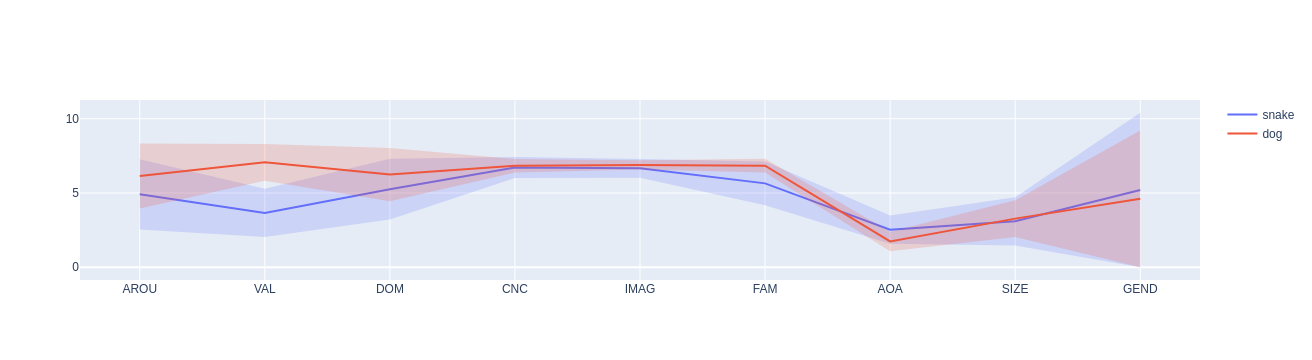

In [31]:
viz_GlasgowR(['snake','dog'], df)

In [32]:
df.loc['jigsaw']

AROU_M      3.323000
VAL_M       5.548000
DOM_M       5.563000
CNC_M       6.219000
IMAG_M      6.438000
FAM_M       5.710000
AOA_M       2.576000
SIZE_M      2.323000
GEND_M      3.909000
AROU_SD     1.941000
VAL_SD      1.187000
DOM_SD      1.540000
CNC_SD      1.111000
IMAG_SD     0.899000
FAM_SD      1.689000
AOA_SD      1.393000
SIZE_SD     1.254000
GEND_SD     0.793000
AROU_VAR    3.767481
VAL_VAR     1.408969
DOM_VAR     2.371600
CNC_VAR     1.234321
IMAG_VAR    0.808201
FAM_VAR     2.852721
AOA_VAR     1.940449
SIZE_VAR    1.572516
GEND_VAR    0.628849
Name: jigsaw, dtype: float64

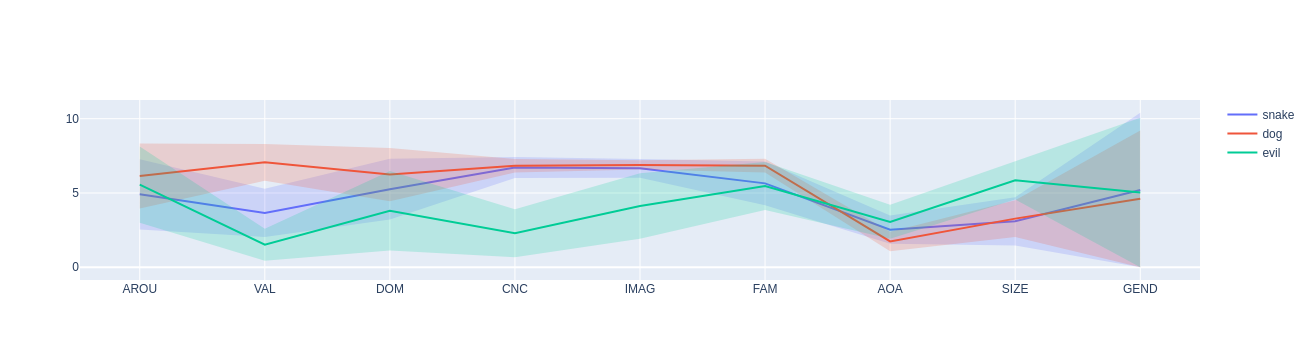

In [33]:
viz_GlasgowR(['snake','dog','evil'], df)

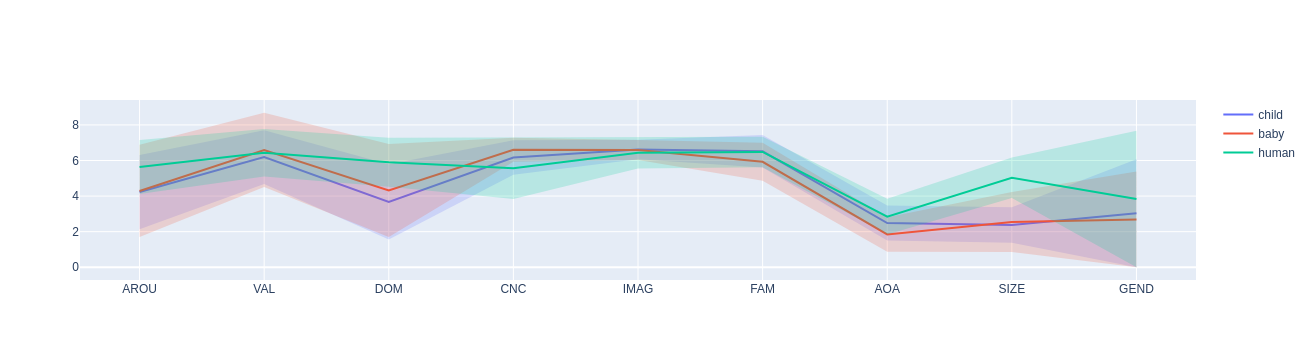

In [34]:
viz_GlasgowR(['child','baby','human'], df)

----
# Index of Dispersion (or Variance-to-mean Ratio)
As discussed with Dr. Miguel Ribeiro, it is not appropriate to use mean and variance as input variables of a factor analysis. However, considering the theoretical hypothesis of this work, variance does impact the interpretation and should be considered, i.e., CNC_M value indicates the average concreteness attributed to a word, but a lower variance may indicate it is more objective than subjective.  

In this chapter, we will create a new indicator -- the variance coefficient -- as the ratio between standard deviation and mean:  
${DI} = \frac{\sigma^2}{\mu}*100$  

> In fact, it is also called "index of dispersion", or Fano index: https://en.wikipedia.org/wiki/Index_of_dispersion 

In [265]:
df_M.head(2)

AROU_M  VAL_M  DOM_M  CNC_M  IMAG_M  FAM_M  AOA_M  SIZE_M  GEND_M
words                                                                      
abattoir   4.200  2.864  4.333  5.455   4.391  2.382  6.760   4.652   5.391
abbey      3.125  5.781  4.667  5.906   5.344  3.324  5.177   5.121   3.303

In [266]:
df_SD.head(2)

AROU_SD  VAL_SD  DOM_SD  CNC_SD  IMAG_SD  FAM_SD  AOA_SD  SIZE_SD  \
words                                                                         
abattoir    2.400   1.740   1.285   1.900    2.121   1.799   0.427    1.549   
abbey       2.342   1.268   1.551   1.508    1.881   1.810   1.339    1.629   

          GEND_SD  
words              
abattoir    1.170  
abbey       1.193

In [267]:
## Checking if indexes in both dataframes are identical:
print(f'Indexes are equals in both dataframes: {df_M.index.equals(df_SD.index)}')

Indexes are equals in both dataframes: True


In [268]:
## Checking if columns stem are equivalent in both dataframes:
re_stem = r'(.+?)_'
stems_df_M = [re.match(re_stem, col).group(1) for col in df_M.columns]
stems_df_SD = [re.match(re_stem, col).group(1) for col in df_SD.columns]
print(f'The stem of each column name is identical: {set(stems_df_M) == set(stems_df_SD)}')

The stem of each column name is identical: True


### Calculating the Dispersion Index:

In [269]:
df_DI = (np.square(df_SD.values) / df_M.values)
df_DI = pd.DataFrame(df_DI, columns=[dim + '_DI' for dim in stems_df_M], index=df_M.index)

In [270]:
df_DI

AROU_DI    VAL_DI    DOM_DI    CNC_DI   IMAG_DI    FAM_DI  \
words                                                                    
abattoir    1.371429  1.057123  0.381081  0.661778  1.024514  1.358691   
abbey       1.755188  0.278122  0.515449  0.385043  0.662081  0.985590   
abbreviate  0.764658  0.202469  0.292769  0.913965  0.897929  0.659684   
abdicate    0.898303  0.507749  1.077421  1.019783  0.919492  1.086358   
abdication  1.354010  0.666408  0.800333  0.797205  0.651278  1.320143   
...              ...       ...       ...       ...       ...       ...   
zeppelin    0.670876  0.399879  0.569670  0.134648  0.203901  1.412449   
zero        1.015264  0.600723  0.987820  1.335947  1.411327  0.227792   
zest        0.780192  0.252856  0.284659  0.646606  0.652339  0.660969   
zoo         0.772850  0.519647  0.465561  0.199579  0.157124  0.539701   
zoology     0.928375  0.163883  0.466763  0.765247  0.560389  0.873103   

              AOA_DI   SIZE_DI   GEND_DI  
words                                     
abattoir    0.026972  0.515778  0.253923  
abbey       0.346324  0.518188  0.430896  
abbreviate  0.230363  1.083615  0.229191  
abdicate    0.114285  0.443787  0.272227  
abdication  0.130103  0.359079  0.225383  
...              ...       ...       ...  
zeppelin    0.147637  0.542065  0.197844  
zero        0.478425  1.103782  0.100338  
zest        0.235110  1.145920  0.296095  
zoo         0.195472  0.724222  0.158464  
zoology     0.227078  0.566371  0.311902  

[5553 rows x 9 columns]

### Preparing a full dataframe with Mean, SD, and DI

In [271]:
## Combining mean, standard deviation, and variance:
df = pd.concat([df_M, df_SD, df_DI], axis=1)
df

AROU_M  VAL_M  DOM_M  CNC_M  IMAG_M  FAM_M  AOA_M  SIZE_M  GEND_M  \
words                                                                           
abattoir     4.200  2.864  4.333  5.455   4.391  2.382  6.760   4.652   5.391   
abbey        3.125  5.781  4.667  5.906   5.344  3.324  5.177   5.121   3.303   
abbreviate   3.273  5.250  5.235  3.286   3.177  5.121  5.543   2.667   3.971   
abdicate     4.194  3.767  4.419  3.367   2.516  3.971  6.233   4.679   5.167   
abdication   3.846  3.880  4.800  3.292   2.571  3.097  6.407   5.083   4.571   
...            ...    ...    ...    ...     ...    ...    ...     ...     ...   
zeppelin     6.185  5.000  5.333  6.286   6.185  3.167  6.036   5.464   5.269   
zero         4.031  4.182  4.567  2.688   3.903  6.269  2.636   1.758   4.172   
zest         5.969  6.818  6.121  4.438   4.033  4.000  5.364   2.636   3.452   
zoo          5.909  6.235  5.485  6.118   6.441  5.655  2.324   4.844   4.059   
zoology      4.571  5.765  5.114  4.429   3.914  4.382  5.824   4.571   3.657   

            AROU_SD  VAL_SD  DOM_SD  CNC_SD  IMAG_SD  FAM_SD  AOA_SD  SIZE_SD  \
words                                                                           
abattoir      2.400   1.740   1.285   1.900    2.121   1.799   0.427    1.549   
abbey         2.342   1.268   1.551   1.508    1.881   1.810   1.339    1.629   
abbreviate    1.582   1.031   1.238   1.733    1.689   1.838   1.130    1.700   
abdicate      1.941   1.383   2.182   1.853    1.521   2.077   0.844    1.441   
abdication    2.282   1.608   1.960   1.620    1.294   2.022   0.913    1.351   
...             ...     ...     ...     ...      ...     ...     ...      ...   
zeppelin      2.037   1.414   1.743   0.920    1.123   2.115   0.944    1.721   
zero          2.023   1.585   2.124   1.895    2.347   1.195   1.123    1.393   
zest          2.158   1.313   1.320   1.694    1.622   1.626   1.123    1.738   
zoo           2.137   1.800   1.598   1.105    1.006   1.747   0.674    1.873   
zoology       2.060   0.972   1.545   1.841    1.481   1.956   1.150    1.609   

            GEND_SD   AROU_DI    VAL_DI    DOM_DI    CNC_DI   IMAG_DI  \
words                                                                   
abattoir      1.170  1.371429  1.057123  0.381081  0.661778  1.024514   
abbey         1.193  1.755188  0.278122  0.515449  0.385043  0.662081   
abbreviate    0.954  0.764658  0.202469  0.292769  0.913965  0.897929   
abdicate      1.186  0.898303  0.507749  1.077421  1.019783  0.919492   
abdication    1.015  1.354010  0.666408  0.800333  0.797205  0.651278   
...             ...       ...       ...       ...       ...       ...   
zeppelin      1.021  0.670876  0.399879  0.569670  0.134648  0.203901   
zero          0.647  1.015264  0.600723  0.987820  1.335947  1.411327   
zest          1.011  0.780192  0.252856  0.284659  0.646606  0.652339   
zoo           0.802  0.772850  0.519647  0.465561  0.199579  0.157124   
zoology       1.068  0.928375  0.163883  0.466763  0.765247  0.560389   

              FAM_DI    AOA_DI   SIZE_DI   GEND_DI  
words                                               
abattoir    1.358691  0.026972  0.515778  0.253923  
abbey       0.985590  0.346324  0.518188  0.430896  
abbreviate  0.659684  0.230363  1.083615  0.229191  
abdicate    1.086358  0.114285  0.443787  0.272227  
abdication  1.320143  0.130103  0.359079  0.225383  
...              ...       ...       ...       ...  
zeppelin    1.412449  0.147637  0.542065  0.197844  
zero        0.227792  0.478425  1.103782  0.100338  
zest        0.660969  0.235110  1.145920  0.296095  
zoo         0.539701  0.195472  0.724222  0.158464  
zoology     0.873103  0.227078  0.566371  0.311902  

[5553 rows x 27 columns]

## Visualizing Dispersion Index

In [272]:
import plotly.graph_objects as go
import plotly.colors as pc

import cufflinks as cf


def viz_Glasgow_DI(words=['dog', 'cat'], dataframe=None):
    '''Visualiza as features psicolínguisticas de uma lista de palavras a partir 
    dos parâmetros dispostos no The Glasgow Norm, já carregados no dataframe "words". 
    Sintaxe: viz_GlasgowR(words, dataframe), onde:
        words = lista de strings contidas no dicionário/base Glasgow Rate.
        dataframe = DataFrame contendo os dados.
        
    Updated: 2023.08.26 - Adding alpha channel to plot standard deviation.
    '''
    if dataframe is None:
        raise ValueError("You need to provide a DataFrame containing the data.")

    ## Eixo-x, numérico:
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    ## Rótulo do eixo-x:
    xticks = ['AROU', 'VAL', 'DOM', 'CNC', 'IMAG', 'FAM', 'AOA', 'SIZE', 'GEND']
    ## Labels a serem buscados no dicionário Glasgow:
    label_M = ['AROU_M', 'VAL_M', 'DOM_M', 'CNC_M', 'IMAG_M', 'FAM_M', 'AOA_M', 'SIZE_M', 'GEND_M']
    label_SD = ['AROU_SD', 'VAL_SD', 'DOM_SD', 'CNC_SD', 'IMAG_SD', 'FAM_SD', 'AOA_SD', 'SIZE_SD', 'GEND_M']
    label_DI = ['AROU_DI', 'VAL_DI', 'DOM_DI', 'CNC_DI', 'IMAG_DI', 'FAM_DI', 'AOA_DI', 'SIZE_DI', 'GEND_DI']
    
    
    # Generate a list of unique colors using Plotly's color scales
    num_colors = len(words)
    colors = pc.qualitative.Plotly[:num_colors]
    
    fig = go.Figure()

    for word, color in zip(words, colors):
        if word in dataframe.index:
            feat_M = list(dataframe.loc[word][label_M])
            feat_SD = list(dataframe.loc[word][label_SD])
            feat_DI = list(dataframe.loc[word][label_DI])
            y_upper = [a + b for a, b in zip(feat_M, feat_SD)]
            y_lower = [a - b for a, b in zip(feat_M, feat_SD)]
            

            fig.add_trace(go.Scatter(
                x=x,
                y=feat_M,
                line=dict(color=color),  # Assign a unique color to each word
                mode='lines',
                name=word,
                showlegend=True
            ))

            fig.add_trace(go.Scatter(
                x=x + x[::-1],  # x, then x reversed
                y=y_upper + y_lower[::-1],  # upper, then lower reversed
                fill='toself',
                # fillcolor='rgba(0,100,80,0.2)',
                # HEX to RGBA (transparency)
                fillcolor=cf.colors.to_rgba(color,.2),
                line=dict(color='rgba(255,255,255,0)'),
                hoverinfo="skip",
                showlegend=False
            ))
            
            fig.add_trace(go.Scatter(
                x=x,
                y=feat_DI,
                mode='markers',  # Adiciona bolinha com texto
                # text=[f"{feat_VC:.1f}"],
                textposition='top center',  # Posição do texto
                marker=dict(
                    color=color,  # Cor igual ao gráfico de linhas
                    size=10  # Tamanho da bolinha
                ),
                name=f'{word} (DI)',
                showlegend=True
            ))
        
    ## Atualizando o xtick label a partir do nome das colunas:
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9],
            ticktext=xticks
        )
    )
    
    return fig

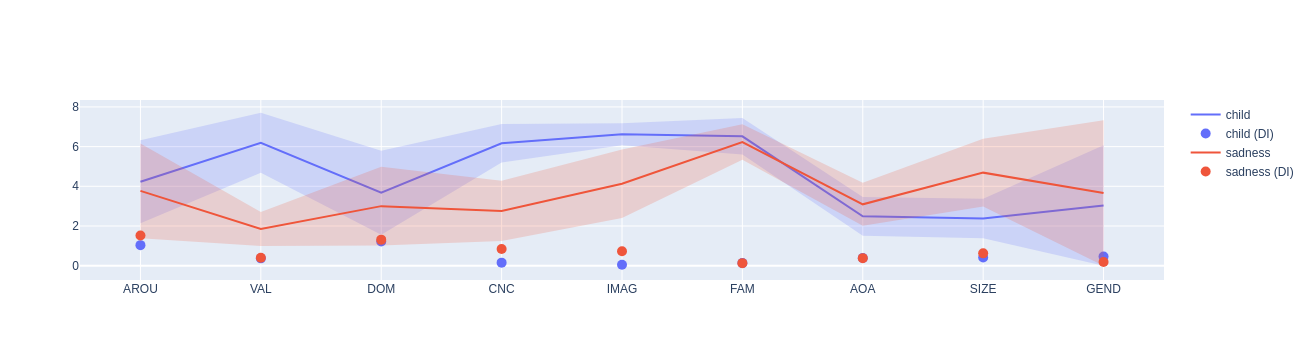

In [273]:
viz_Glasgow_DI(['child','sadness'], df)

----
# Factor Analysis (based on **the mean**)
Based on the https://towardsdatascience.com/factor-analysis-a-complete-tutorial-1b7621890e42.
> It is not a detailed tutorial.    

This tutorial brings more reference on factor analysis calculation: https://medium.com/@hongwy1128/intro-guide-to-factor-analysis-python-84dd0b0fd729

In [254]:
from factor_analyzer import FactorAnalyzer

In [255]:
## Selecting a subset of the original dataframe with only the columns of interest:
# x = glasgow[interest]

In [256]:
## Creating the estimator (Factor analyzer)
fa = FactorAnalyzer()
fa.fit(df_M)

FactorAnalyzer(rotation_kwargs={})

In [257]:
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev

array([2.67925261, 2.32815443, 1.18621682, 1.16698285, 0.71511724,
       0.40366205, 0.26054148, 0.19288633, 0.06718619])

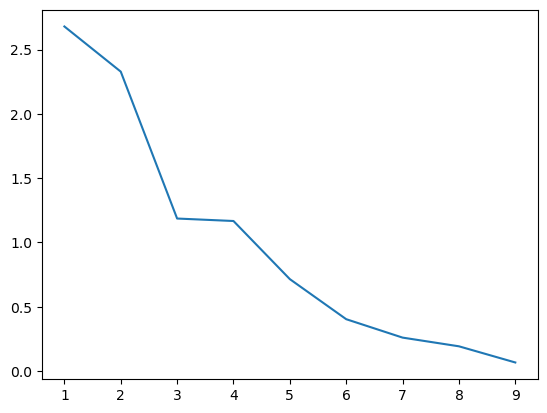

In [258]:
plt.plot(range(1,df_M.shape[1]+1),ev)

> Fatores com auto-valor <= 1 é um fator não mais informativo do que uma única variável. Traz igual ou menos informação do que uma variável sozinha.

### Choosing two factors and analyzing their structure:

> Choosing 2 factors (> than 2).
>> Although I would like to have just 2 -> objective and subjective.

In [259]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(df_M)
loads = fa.loadings_
print(loads)

[[-0.33113009  0.43635573  0.12763506]
 [ 0.04601261  0.92498952  0.10517323]
 [ 0.02370786  0.7381668   0.05409206]
 [ 0.99712518  0.02357699  0.06216025]
 [ 0.83226077  0.07259896  0.23173112]
 [ 0.01883287  0.19107411  0.80762794]
 [-0.34724071 -0.08530271 -0.80275716]
 [-0.46643465  0.16877959 -0.03379718]
 [ 0.06896059 -0.23830211 -0.16664011]]


### Analyzing the factor structure:

In [260]:
def highlight_high_values(val, th=0.5):
    ''' Highlights values higher or lower than 0.5. Must be applied as a map in a Pandas.DataFrame style.
    '''
    # color = 'background-color: yellow' if ((val > th) or (val < -th)) else ''
    if (val > th):
        color = 'background-color: yellow' 
    elif (val < -th):
        color = 'background-color: red'
    else:
        color = ''
    return color

In [261]:
## Creating a dataframe with the loading values and column names:
factors = pd.DataFrame(fa.loadings_, columns=['Factor 1','Factor 2','Factor 3'], index=[df_M.columns])

In [274]:
factors.style.applymap(highlight_high_values, th=0.4)

### Discussion regarding Factor Analysis:
- As expected to, it seems **Factor 1** may relate to objectivity:  
    > It is strongly related to concreteness; and  
    > It is strongly related to imageability, i.e., how ones can easily imagine or picture a given concept.

- **Factor 2**, on the other hand, seems to relate to subjectivity, strongly influenced by valence, dominance and partially related to arousal.  

- A third factor emerges from these data, **Factor 3**, mostly related to familiarity. This factor can be theoretically associated to context.

In [279]:
factors = ['F_Objectivity','F_Subjectivity','F_Context']

### Calculating Factor Variance:

In [280]:
variance_metrics = fa.get_factor_variance()

# A Soma dos Quadrados dos Loadings estará na terceira coluna (índice 2)
sum_squared_loadings = variance_metrics[2]

print("Sum of Squared Loadings por fator:", sum_squared_loadings)

Sum of Squared Loadings por fator: [0.23805451 0.42980884 0.58685711]


In [281]:
pd.DataFrame(variance_metrics, columns=factors, index=['SumSquared Loadings','Proportional Var','Cumulative Var'])

F_Objectivity  F_Subjectivity  F_Context
SumSquared Loadings       2.142491        1.725789   1.413434
Proportional Var          0.238055        0.191754   0.157048
Cumulative Var            0.238055        0.429809   0.586857

> The "Cumulative Variance" above indicates that 58% of the variance of the data is explained by these three factors.

### Criação das variáveis latentes:

In [282]:
scores = pd.DataFrame(fa.transform(df_M), columns=factors, index=df_M.index)

In [283]:
scores

F_Objectivity  F_Subjectivity  F_Context
words                                               
abattoir         0.932546       -1.094743  -2.723893
abbey            1.215183        0.128420  -1.653890
abbreviate      -0.875451       -0.025715  -0.619482
abdicate        -0.620040       -0.675388  -1.516463
abdication      -0.559101       -0.684211  -2.008801
...                   ...             ...        ...
zeppelin         1.091176        0.474037  -2.083340
zero            -1.588099       -0.736184   1.613288
zest             0.173272        1.201733  -1.378757
zoo              0.994645        0.745553   0.804080
zoology          0.064774        0.403951  -1.301749

[5553 rows x 3 columns]

In [284]:
fa.get_communalities()

array([0.31634417, 0.86878418, 0.54837824, 0.9986784 , 0.75162791,
       0.68912688, 0.77227172, 0.24719008, 0.08931238])

In [285]:
scores.describe()

F_Objectivity  F_Subjectivity     F_Context
count   5.553000e+03    5.553000e+03  5.553000e+03
mean   -3.480418e-16   -1.074835e-16  2.072896e-16
std     1.020413e+00    9.506500e-01  9.100249e-01
min    -2.459347e+00   -2.408166e+00 -3.113332e+00
25%    -8.777826e-01   -5.680641e-01 -6.160449e-01
50%     8.048374e-03    3.275796e-02  5.091581e-02
75%     9.524171e-01    5.902665e-01  6.782073e-01
max     1.987073e+00    2.602231e+00  2.316282e+00

In [286]:
## Exemplifying with a trial word:
scores.loc['dog']

F_Objectivity     1.425720
F_Subjectivity    1.348524
F_Context         1.427143
Name: dog, dtype: float64

## Evaluating factor distributions:

In [290]:
scores

F_Objectivity  F_Subjectivity  F_Context
words                                               
abattoir         0.932546       -1.094743  -2.723893
abbey            1.215183        0.128420  -1.653890
abbreviate      -0.875451       -0.025715  -0.619482
abdicate        -0.620040       -0.675388  -1.516463
abdication      -0.559101       -0.684211  -2.008801
...                   ...             ...        ...
zeppelin         1.091176        0.474037  -2.083340
zero            -1.588099       -0.736184   1.613288
zest             0.173272        1.201733  -1.378757
zoo              0.994645        0.745553   0.804080
zoology          0.064774        0.403951  -1.301749

[5553 rows x 3 columns]

In [292]:
import seaborn as sns

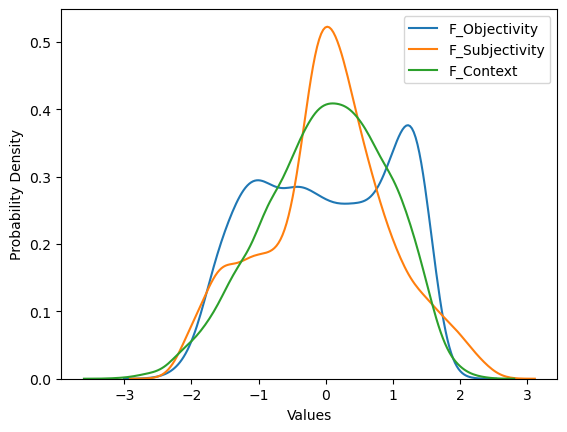

In [294]:
sns.kdeplot(scores['F_Objectivity'], label='F_Objectivity')
sns.kdeplot(scores['F_Subjectivity'], label='F_Subjectivity')
sns.kdeplot(scores['F_Context'], label='F_Context')
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

### Evaluating the factors through Cronbach alpha measurement:

In [287]:
import pingouin as pg

In [288]:
#Create the factors
factor1 = df[['CNC_M', 'IMAG_M', 'SIZE_M']]
factor2 = df[['AROU_M','VAL_M', 'DOM_M']]
factor3 = df[['FAM_M','AOA_M']]

In [289]:
#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.3326024971478367, array([0.302, 0.362])) (0.6918832855428504, array([0.678, 0.706])) (-3.6261663556302324, array([-3.876, -3.389]))


Cronbach alpha was negative, which means this factor shouldn't be used.  
However, it would be a naive interpretation, since in fact such variables are theoretically sustained. If this factor were part of a test, it would be recommendable to change their structure. In this case, it seems affordable to keep them.  

More on this can be found at: https://stats.stackexchange.com/questions/220384/cfa-negative-factor-loadings

-----
# Clustering analysis

In [298]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5553 entries, abattoir to zoology
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   F_Objectivity   5553 non-null   float64
 1   F_Subjectivity  5553 non-null   float64
 2   F_Context       5553 non-null   float64
dtypes: float64(3)
memory usage: 302.6+ KB


In [366]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [367]:
# Assuming the DataFrame is loaded as 'scores'
# Standardize the data (important for K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(scores)

# Choose the number of clusters (you can adjust this)
num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to your DataFrame
scores['Cluster'] = kmeans.labels_

/home/tbnsilveira/anaconda3/envs/phd/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [368]:
import plotly.express as px

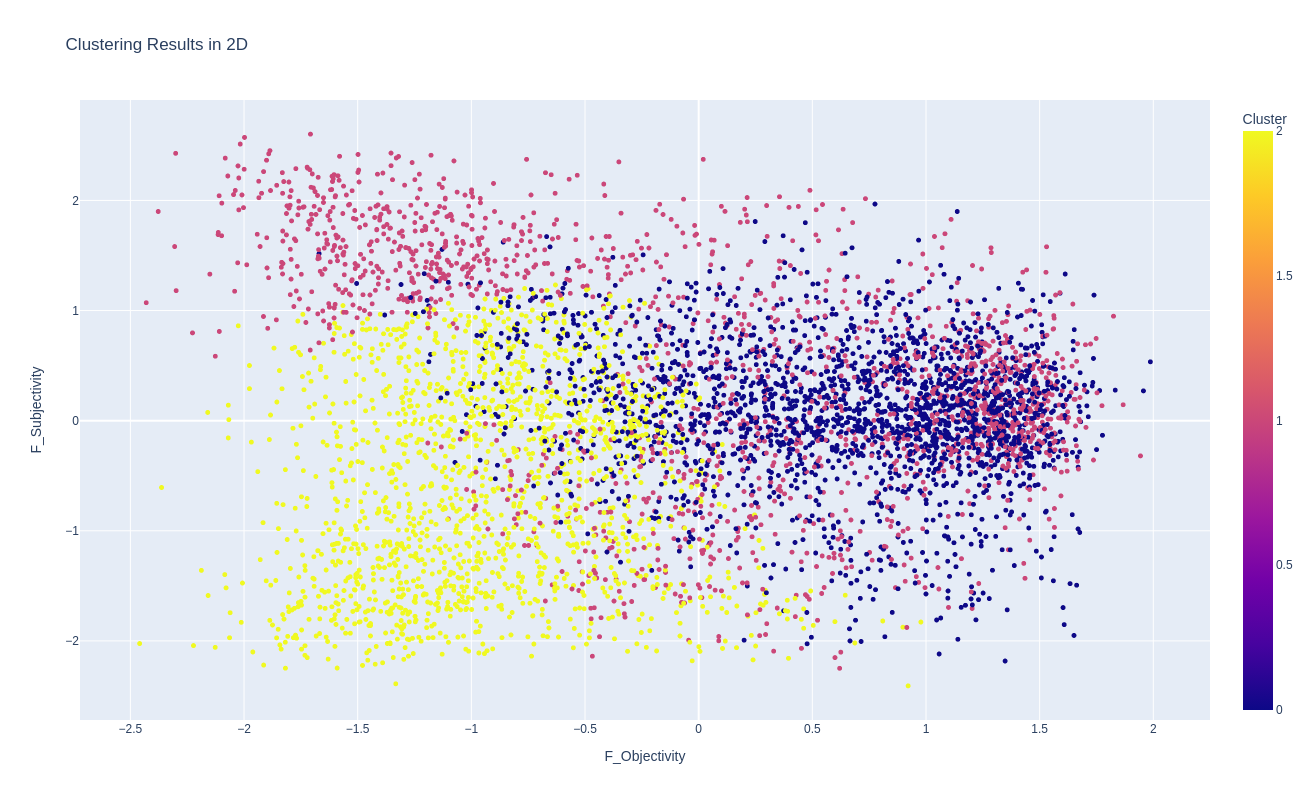

In [369]:
# Create a 3D scatter plot for visualization
fig = px.scatter(scores, x='F_Objectivity', y='F_Subjectivity', color='Cluster',
                     title='Clustering Results in 2D', hover_name=scores.index)

# Customize the visualization
fig.update_traces(marker=dict(size=5))  # Adjust the size of data points

# Set the figure size (width and height) in pixels
fig.update_layout(width=1000, height=800)

fig.show()

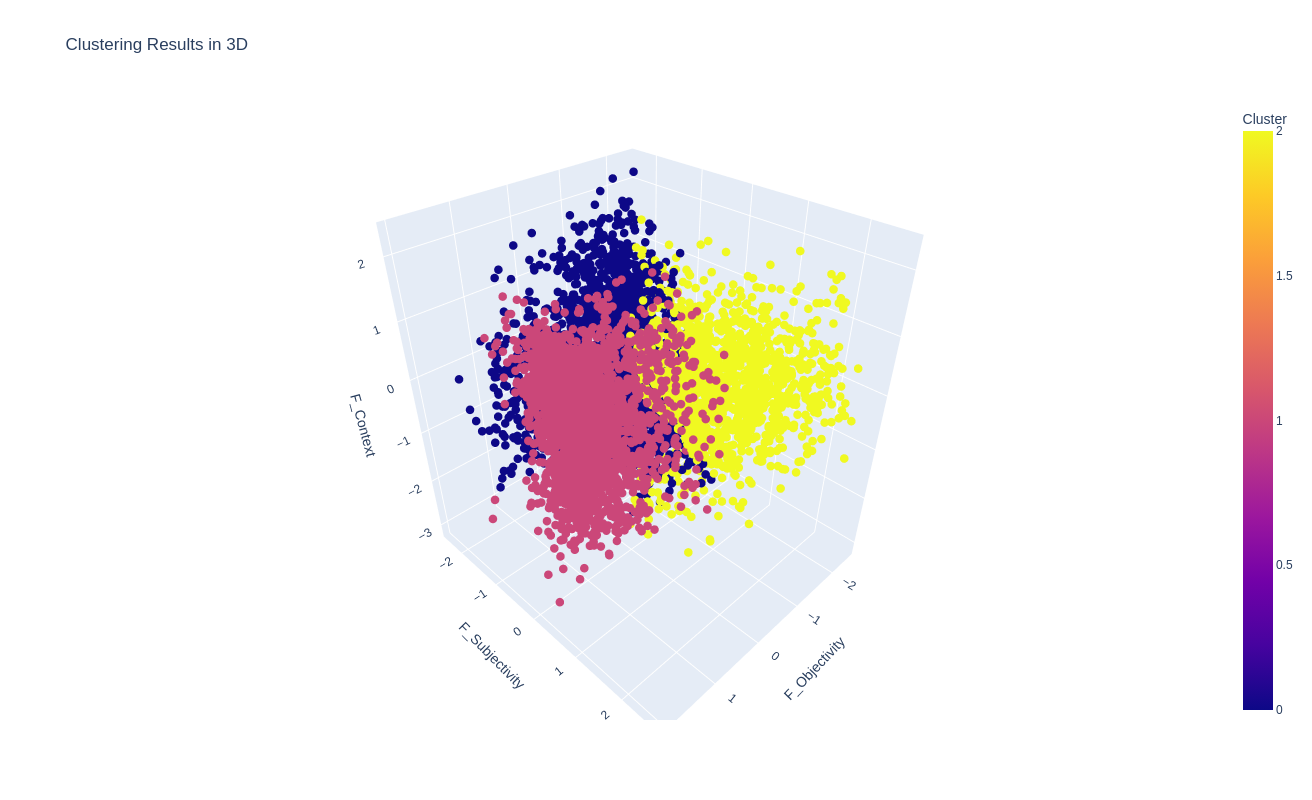

In [337]:
# Create a 3D scatter plot for visualization
fig = px.scatter_3d(scores, x='F_Objectivity', y='F_Subjectivity', z='F_Context', color='Cluster',
                     title='Clustering Results in 3D')

# Customize the visualization
fig.update_traces(marker=dict(size=5))  # Adjust the size of data points

# Set the figure size (width and height) in pixels
fig.update_layout(width=1000, height=800)

fig.show()

-----
# Confirmatory Factor Analysis (CFA)
This experiment aims to prove the relationship of the most related variables to each factor.  
https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html#module-factor_analyzer.confirmatory_factor_analyzer

In [347]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer,
                             ModelSpecificationParser)

In [349]:
df_M

AROU_M  VAL_M  DOM_M  CNC_M  IMAG_M  FAM_M  AOA_M  SIZE_M  GEND_M
words                                                                        
abattoir     4.200  2.864  4.333  5.455   4.391  2.382  6.760   4.652   5.391
abbey        3.125  5.781  4.667  5.906   5.344  3.324  5.177   5.121   3.303
abbreviate   3.273  5.250  5.235  3.286   3.177  5.121  5.543   2.667   3.971
abdicate     4.194  3.767  4.419  3.367   2.516  3.971  6.233   4.679   5.167
abdication   3.846  3.880  4.800  3.292   2.571  3.097  6.407   5.083   4.571
...            ...    ...    ...    ...     ...    ...    ...     ...     ...
zeppelin     6.185  5.000  5.333  6.286   6.185  3.167  6.036   5.464   5.269
zero         4.031  4.182  4.567  2.688   3.903  6.269  2.636   1.758   4.172
zest         5.969  6.818  6.121  4.438   4.033  4.000  5.364   2.636   3.452
zoo          5.909  6.235  5.485  6.118   6.441  5.655  2.324   4.844   4.059
zoology      4.571  5.765  5.114  4.429   3.914  4.382  5.824   4.571   3.657

[5553 rows x 9 columns]

In [350]:
scores

F_Objectivity  F_Subjectivity  F_Context  Cluster
words                                                        
abattoir         0.932546       -1.094743  -2.723893        1
abbey            1.215183        0.128420  -1.653890        1
abbreviate      -0.875451       -0.025715  -0.619482        0
abdicate        -0.620040       -0.675388  -1.516463        1
abdication      -0.559101       -0.684211  -2.008801        1
...                   ...             ...        ...      ...
zeppelin         1.091176        0.474037  -2.083340        1
zero            -1.588099       -0.736184   1.613288        0
zest             0.173272        1.201733  -1.378757        1
zoo              0.994645        0.745553   0.804080        2
zoology          0.064774        0.403951  -1.301749        1

[5553 rows x 4 columns]

In [354]:
model_dict = {"F_Objectivity": ["CNC_M", "IMAG_M", "SIZE_M"],
              "F_Subjectivity": ["AROU_M","VAL_M","DOM_M"],
              "F_Context": ["FAM_M","AOA_M","GEND_M"]}

model_spec = ModelSpecificationParser.parse_model_specification_from_dict(df_M, model_dict)

In [356]:
cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=True)
cfa.fit(df_M.values)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           42     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99018D+04    |proj g|=  5.68559D+03

At iterate    1    f=  7.30559D+04    |proj g|=  2.11797D+03

At iterate    2    f=  7.12317D+04    |proj g|=  2.12424D+03

At iterate    3    f=  7.19035D+04    |proj g|=  1.55399D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   42      3      8      1     0     0   1.554D+04   7.190D+04
  F =   71903.543815969737     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


ConfirmatoryFactorAnalyzer(n_obs=5553,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x7f58017f8cd0>)

In [359]:
cfa.loadings_

array([[-1.79377515,  0.        ,  0.        ],
       [ 1.92114334,  0.        ,  0.        ],
       [ 1.07068071,  0.        ,  0.        ],
       [ 0.        ,  2.17887473,  0.        ],
       [ 0.        ,  1.96516246,  0.        ],
       [ 0.        , -2.91445448,  0.        ],
       [ 0.        ,  0.        ,  0.1730615 ],
       [ 0.        ,  0.        , -0.95078489],
       [ 0.        ,  0.        , -2.33794355]])

In [360]:
cfa.factor_varcovs_

array([[ 1.00000000e+00, -2.13201006e-05, -5.57235755e-01],
       [-2.13201006e-05,  1.00000000e+00, -3.22977258e+00],
       [-5.57235755e-01, -3.22977258e+00,  1.00000000e+00]])

In [361]:
cfa.get_standard_errors()

(array([[0.02530255, 0.        , 0.        ],
        [0.02212408, 0.        , 0.        ],
        [0.01065894, 0.        , 0.        ],
        [0.        , 0.00493344, 0.        ],
        [0.        , 0.02049517, 0.        ],
        [0.        , 0.03226618, 0.        ],
        [0.        , 0.        , 0.02442667],
        [0.        , 0.        , 0.01717448],
        [0.        , 0.        , 0.02151079]]),
 array([0.03098215, 0.02918836, 0.01375349, 0.0394084 , 0.06129174,
        0.03001026, 0.04787676, 0.02418909, 0.07541362]))

In [358]:
cfa.transform(df_M.values)

array([[-0.68349665,  1.94565151, -0.50622077],
       [ 0.91554802,  0.88114736,  0.15927399],
       [ 0.3779255 ,  0.92021059,  0.29358864],
       ...,
       [ 0.04686807,  1.17116756,  0.48480506],
       [ 0.03778734, -1.16914742, -0.11997493],
       [ 0.32604265,  0.9120254 ,  0.12383635]])

In [362]:
final_scores = pd.DataFrame(cfa.transform(df_M.values), columns=factors, index=df_M.index)

In [363]:
final_scores

F_Objectivity  F_Subjectivity  F_Context
words                                               
abattoir        -0.683497        1.945652  -0.506221
abbey            0.915548        0.881147   0.159274
abbreviate       0.377925        0.920211   0.293589
abdicate        -0.271032        1.889290  -0.436978
abdication      -0.276944        2.561086  -0.278026
...                   ...             ...        ...
zeppelin        -0.585658        0.690017  -0.596397
zero            -0.082263        0.125780   0.311840
zest             0.046868        1.171168   0.484805
zoo              0.037787       -1.169147  -0.119975
zoology          0.326043        0.912025   0.123836

[5553 rows x 3 columns]

In [370]:
# Assuming the DataFrame is loaded as 'scores'
# Standardize the data (important for K-Means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(final_scores)

# Choose the number of clusters (you can adjust this)
num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data_scaled)

# Add cluster labels to your DataFrame
final_scores['Cluster'] = kmeans.labels_

/home/tbnsilveira/anaconda3/envs/phd/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



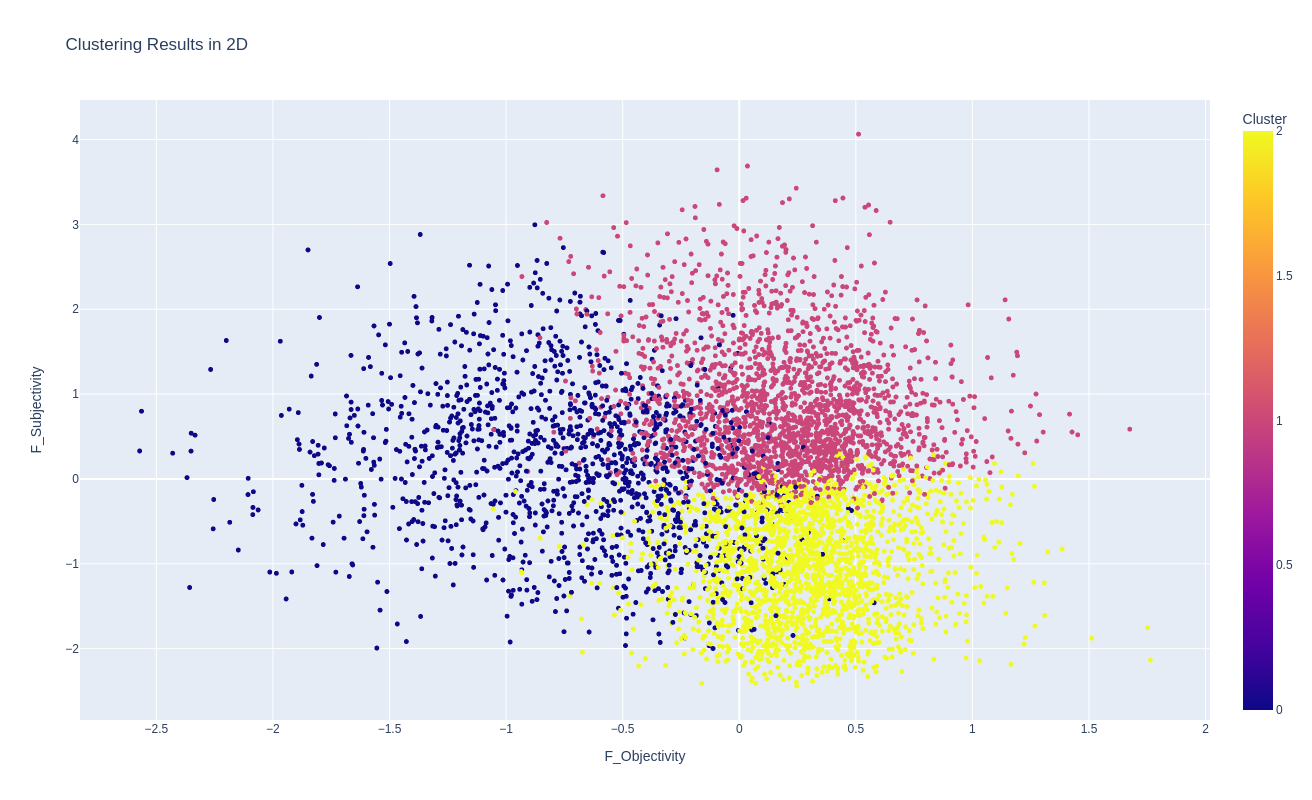

In [372]:
# Create a 3D scatter plot for visualization
fig = px.scatter(final_scores, x='F_Objectivity', y='F_Subjectivity', color='Cluster',
                     title='Clustering Results in 2D', hover_name=scores.index)

# Customize the visualization
fig.update_traces(marker=dict(size=5))  # Adjust the size of data points

# Set the figure size (width and height) in pixels
fig.update_layout(width=1000, height=800)

fig.show()

-----
# Next Steps:
- Calculating a logistic regression making use of the previous factors;  
- Study (and implement) confirmatory factor analysis. What are the differences with EFA? 
- Implement Structural Equation Modeling.

----

# (SEMopy) Structural Equation Modeling
- Important: before running the code below, make sure Graphviz is installed in your system.
  - If using linux, you may run "$sudo apt-get install graphviz".

In [72]:
import semopy

### Following the TDS Tutorial:
https://towardsdatascience.com/structural-equation-modeling-dca298798f4d

In [51]:
import boto

In [56]:
# import the csv file directly from an s3 bucket
data = pd.read_csv('s3://articledatas3/StructuralEquationModelingData.csv')

In [60]:
data.head()

PsychTest1  PsychTest2  YrsEdu   IQ  HrsTrn  HrsWrk  ClientSat  SuperSat  \
0          62          78       5   97       6      33         84        59   
1          46          27       2   93       7      54         55        38   
2          68          75       2   96       5      47         70        68   
3          55          56       4  103       7      80         63        81   
4          51          32       4   98       5      53         55        39   

   ProjCompl  
0         34  
1         56  
2         38  
3         78  
4         56

In [61]:
# Specify the model relations using the same syntax given before
model_spec = """
  # measurement model
    JobPerf =~ ClientSat + SuperSat + ProjCompl
    Social =~ PsychTest1 + PsychTest2
    Intellect =~ YrsEdu + IQ
    Motivation =~ HrsTrn + HrsWrk
  # regressions
    JobPerf ~ Social + Intellect + Motivation
"""

# Instantiate the model
model = semopy.Model(model_spec)

# Fit the model using the data
model.fit(data)

# Show the results using the inspect method
model.inspect()

lval  op        rval    Estimate   Std. Err    z-value   p-value
0      JobPerf   ~      Social    0.520710   0.047859  10.880135       0.0
1      JobPerf   ~   Intellect    1.028610   0.115507    8.90516       0.0
2      JobPerf   ~  Motivation    2.959053   0.254667  11.619305       0.0
3    ClientSat   ~     JobPerf    1.000000          -          -         -
4     SuperSat   ~     JobPerf    2.513349   0.209255  12.010915       0.0
5    ProjCompl   ~     JobPerf    2.576769   0.219995  11.712857       0.0
6   PsychTest1   ~      Social    1.000000          -          -         -
7   PsychTest2   ~      Social    2.341014   0.094722  24.714481       0.0
8       YrsEdu   ~   Intellect    1.000000          -          -         -
9           IQ   ~   Intellect    4.669745   0.496146   9.412035       0.0
10      HrsTrn   ~  Motivation    1.000000          -          -         -
11      HrsWrk   ~  Motivation   11.874649   0.270847  43.842687       0.0
12     JobPerf  ~~     JobPerf    0.000000   0.277679        0.0       1.0
13      Social  ~~      Social   41.070939   3.673067  11.181646       0.0
14      Social  ~~   Intellect   -0.020787   0.161337  -0.128845   0.89748
15      Social  ~~  Motivation   -0.876037   0.413701  -2.117562  0.034212
16   Intellect  ~~   Intellect    0.633626   0.098612   6.425429       0.0
17   Intellect  ~~  Motivation    0.021948    0.05108   0.429679  0.667429
18  Motivation  ~~  Motivation    4.108135   0.260543  15.767619       0.0
19    SuperSat  ~~    SuperSat    9.702385   1.099544   8.824008       0.0
20      YrsEdu  ~~      YrsEdu    2.309099   0.117187  19.704347       0.0
21   ClientSat  ~~   ClientSat  311.705558  13.940814  22.359208       0.0
22  PsychTest2  ~~  PsychTest2    0.000000   3.049292        0.0       1.0
23   ProjCompl  ~~   ProjCompl  117.396961   5.356473  21.916839       0.0
24  PsychTest1  ~~  PsychTest1   59.702758   2.727348   21.89041       0.0
25          IQ  ~~          IQ    0.000000   1.208046        0.0       1.0
26      HrsWrk  ~~      HrsWrk    0.000000   2.563067        0.0       1.0
27      HrsTrn  ~~      HrsTrn    2.056801   0.093762   21.93647       0.0

In [62]:
df_M_VAR

AROU_M  VAL_M  DOM_M  CNC_M  IMAG_M  FAM_M  AOA_M  SIZE_M  GEND_M  \
words                                                                           
abattoir     4.200  2.864  4.333  5.455   4.391  2.382  6.760   4.652   5.391   
abbey        3.125  5.781  4.667  5.906   5.344  3.324  5.177   5.121   3.303   
abbreviate   3.273  5.250  5.235  3.286   3.177  5.121  5.543   2.667   3.971   
abdicate     4.194  3.767  4.419  3.367   2.516  3.971  6.233   4.679   5.167   
abdication   3.846  3.880  4.800  3.292   2.571  3.097  6.407   5.083   4.571   
...            ...    ...    ...    ...     ...    ...    ...     ...     ...   
zeppelin     6.185  5.000  5.333  6.286   6.185  3.167  6.036   5.464   5.269   
zero         4.031  4.182  4.567  2.688   3.903  6.269  2.636   1.758   4.172   
zest         5.969  6.818  6.121  4.438   4.033  4.000  5.364   2.636   3.452   
zoo          5.909  6.235  5.485  6.118   6.441  5.655  2.324   4.844   4.059   
zoology      4.571  5.765  5.114  4.429   3.914  4.382  5.824   4.571   3.657   

            AROU_VAR   VAL_VAR   DOM_VAR   CNC_VAR  IMAG_VAR   FAM_VAR  \
words                                                                    
abattoir    5.760000  3.027600  1.651225  3.610000  4.498641  3.236401   
abbey       5.484964  1.607824  2.405601  2.274064  3.538161  3.276100   
abbreviate  2.502724  1.062961  1.532644  3.003289  2.852721  3.378244   
abdicate    3.767481  1.912689  4.761124  3.433609  2.313441  4.313929   
abdication  5.207524  2.585664  3.841600  2.624400  1.674436  4.088484   
...              ...       ...       ...       ...       ...       ...   
zeppelin    4.149369  1.999396  3.038049  0.846400  1.261129  4.473225   
zero        4.092529  2.512225  4.511376  3.591025  5.508409  1.428025   
zest        4.656964  1.723969  1.742400  2.869636  2.630884  2.643876   
zoo         4.566769  3.240000  2.553604  1.221025  1.012036  3.052009   
zoology     4.243600  0.944784  2.387025  3.389281  2.193361  3.825936   

             AOA_VAR  SIZE_VAR  GEND_VAR  
words                                     
abattoir    0.182329  2.399401  1.368900  
abbey       1.792921  2.653641  1.423249  
abbreviate  1.276900  2.890000  0.910116  
abdicate    0.712336  2.076481  1.406596  
abdication  0.833569  1.825201  1.030225  
...              ...       ...       ...  
zeppelin    0.891136  2.961841  1.042441  
zero        1.261129  1.940449  0.418609  
zest        1.261129  3.020644  1.022121  
zoo         0.454276  3.508129  0.643204  
zoology     1.322500  2.588881  1.140624  

[5553 rows x 18 columns]

In [40]:
factors.style.applymap(highlight_high_values)

In [73]:
# Specify the model relations using the same syntax given before
model_spec = """
  # measurement model
    Semantic_Content =~ AROU_M + VAL_M + DOM_M + CNC_M + IMAG_M + FAM_M + AOA_M +SIZE_M
    Subjective_Factor =~ CNC_M + IMAG_M + SIZE_M + CNC_VAR + IMAG_VAR
    Objective_Factor =~ VAL_M + FAM_M + AOA_M + FAM_VAR
  # regressions
    Semantic_Content ~ Subjective_Factor + Objective_Factor
"""

# Instantiate the model
model = semopy.Model(model_spec)

# Fit the model using the data
model.fit(df)

# Show the results using the inspect method
model.inspect()

lval  op               rval  Estimate  Std. Err     z-value  \
0    Semantic_Content   ~  Subjective_Factor -0.200623  0.013237  -15.156717   
1    Semantic_Content   ~   Objective_Factor  1.179014  0.105525   11.172876   
2              AROU_M   ~   Semantic_Content  1.000000         -           -   
3               VAL_M   ~   Semantic_Content  0.507280  0.024784   20.468252   
4               VAL_M   ~   Objective_Factor  1.000000         -           -   
5               DOM_M   ~   Semantic_Content  0.371463  0.014547   25.535302   
6               CNC_M   ~   Semantic_Content -0.126797  0.018961   -6.687292   
7               CNC_M   ~  Subjective_Factor  1.000000         -           -   
8              IMAG_M   ~   Semantic_Content  0.126040  0.018848    6.687326   
9              IMAG_M   ~  Subjective_Factor  0.997407  0.007684  129.804166   
10              FAM_M   ~   Semantic_Content -0.050286  0.011026   -4.560503   
11              FAM_M   ~   Objective_Factor  3.234920  0.238024   13.590718   
12              AOA_M   ~   Semantic_Content  0.264497  0.018039   14.662156   
13              AOA_M   ~   Objective_Factor -3.266638  0.243776   -13.40014   
14             SIZE_M   ~   Semantic_Content  0.507761  0.017186   29.544543   
15             SIZE_M   ~  Subjective_Factor -0.222097  0.009005  -24.664333   
16            CNC_VAR   ~  Subjective_Factor -0.389264  0.008521  -45.680341   
17           IMAG_VAR   ~  Subjective_Factor -0.561649  0.008833  -63.582465   
18            FAM_VAR   ~   Objective_Factor -3.010887  0.221858  -13.571223   
19   Semantic_Content  ~~   Semantic_Content  0.823837  0.030377   27.120659   
20   Objective_Factor  ~~   Objective_Factor  0.080152  0.011812    6.785349   
21  Subjective_Factor  ~~  Subjective_Factor  1.748819  0.038646   45.252268   
22  Subjective_Factor  ~~   Objective_Factor  0.063761  0.007282    8.755692   
23            FAM_VAR  ~~            FAM_VAR  0.375950  0.009856   38.142523   
24           IMAG_VAR  ~~           IMAG_VAR  0.633087  0.012457   50.819821   
25             AROU_M  ~~             AROU_M  0.224954  0.023157    9.714443   
26              VAL_M  ~~              VAL_M  1.974225   0.03875   50.948189   
27             IMAG_M  ~~             IMAG_M  0.130027  0.008841    14.70678   
28              DOM_M  ~~              DOM_M  0.691952  0.013783   50.202656   
29              FAM_M  ~~              FAM_M  0.044324  0.007809    5.675697   
30             SIZE_M  ~~             SIZE_M  0.642575  0.013975   45.980391   
31              AOA_M  ~~              AOA_M  0.760837  0.016714   45.520403   
32            CNC_VAR  ~~            CNC_VAR  0.632313  0.012206   51.804977   
33              CNC_M  ~~              CNC_M  0.169506  0.008985   18.864457   

     p-value  
0        0.0  
1        0.0  
2          -  
3        0.0  
4          -  
5        0.0  
6        0.0  
7          -  
8        0.0  
9        0.0  
10  0.000005  
11       0.0  
12       0.0  
13       0.0  
14       0.0  
15       0.0  
16       0.0  
17       0.0  
18       0.0  
19       0.0  
20       0.0  
21       0.0  
22       0.0  
23       0.0  
24       0.0  
25       0.0  
26       0.0  
27       0.0  
28       0.0  
29       0.0  
30       0.0  
31       0.0  
32       0.0  
33       0.0

In [75]:
# Specify the model relations using the same syntax given before
model_spec = """
  # measurement model
    Semantic_Content =~ Subjective_Factor + Objective_Factor
    Subjective_Factor =~ CNC_M + IMAG_M + SIZE_M + CNC_VAR + IMAG_VAR
    Objective_Factor =~ VAL_M + FAM_M + AOA_M + FAM_VAR
"""

# Instantiate the model
model = semopy.Model(model_spec)

# Fit the model using the data
model.fit(df)

# Show the results using the inspect method
model.inspect()

lval  op               rval  Estimate  Std. Err     z-value  \
0   Subjective_Factor   ~   Semantic_Content  1.000000         -           -   
1    Objective_Factor   ~   Semantic_Content  0.090155  0.008692   10.372222   
2               CNC_M   ~  Subjective_Factor  1.000000         -           -   
3              IMAG_M   ~  Subjective_Factor  0.941769  0.007418  126.957092   
4              SIZE_M   ~  Subjective_Factor -0.297975   0.00963  -30.941696   
5             CNC_VAR   ~  Subjective_Factor -0.386922  0.008244  -46.935733   
6            IMAG_VAR   ~  Subjective_Factor -0.551107  0.008517  -64.705093   
7               VAL_M   ~   Objective_Factor  1.000000         -           -   
8               FAM_M   ~   Objective_Factor  2.307082  0.121399   19.004169   
9               AOA_M   ~   Objective_Factor -2.159778  0.116023  -18.615077   
10            FAM_VAR   ~   Objective_Factor -2.145450  0.113051  -18.977773   
11   Objective_Factor  ~~   Objective_Factor  0.147322  0.015567    9.463703   
12  Subjective_Factor  ~~  Subjective_Factor  0.831304  0.019545   42.531855   
13   Semantic_Content  ~~   Semantic_Content  1.004313  0.019542   51.391364   
14            FAM_VAR  ~~            FAM_VAR  0.386077  0.010383   37.183365   
15           IMAG_VAR  ~~           IMAG_VAR  0.627700  0.012455   50.397803   
16              VAL_M  ~~              VAL_M  2.233612   0.04251   52.543128   
17             IMAG_M  ~~             IMAG_M  0.189418  0.009097   20.821821   
18              FAM_M  ~~              FAM_M  0.031131  0.008503    3.661244   
19             SIZE_M  ~~             SIZE_M  0.879571  0.016843   52.223266   
20              AOA_M  ~~              AOA_M  0.817999  0.017253   47.412888   
21            CNC_VAR  ~~            CNC_VAR  0.622855  0.012079   51.567166   
22              CNC_M  ~~              CNC_M  0.170339  0.009949   17.121475   

     p-value  
0          -  
1        0.0  
2          -  
3        0.0  
4        0.0  
5        0.0  
6        0.0  
7          -  
8        0.0  
9        0.0  
10       0.0  
11       0.0  
12       0.0  
13       0.0  
14       0.0  
15       0.0  
16       0.0  
17       0.0  
18  0.000251  
19       0.0  
20       0.0  
21       0.0  
22       0.0

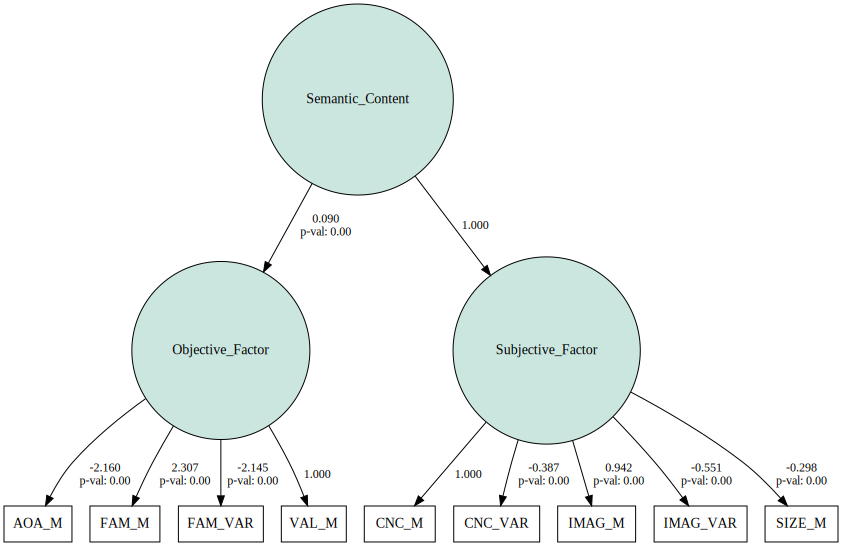

In [77]:
g = semopy.semplot(model, '../output/model.png')
g